In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [53]:
df = pd.read_csv(r"C:\Users\gerar\OneDrive\Pulpit\4 semestr\Wstęp do eksploracji danych\pracadomowa6\Animation_Movies.csv")

## (1) Opis zbioru danych

In [54]:
print("Rozmiar zbioru danych:", df.shape)
print("Braki danych:\n", df.isnull().sum())
print("Typy danych:\n", df.dtypes)

Rozmiar zbioru danych: (51945, 23)
Braki danych:
 id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64
Typy danych:
 id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime  

## (2) Podstawowe statystyki opisowe zmiennych liczbowych

In [55]:
stats = df.select_dtypes(include=[np.number]).describe()
print("Statystyki opisowe dla wszystkich kolumn liczbowych w zbiorze danych:\n", stats)

Statystyki opisowe dla wszystkich kolumn liczbowych w zbiorze danych:
                  id  vote_average    vote_count       revenue       runtime  \
count  5.194500e+04  51945.000000  51945.000000  5.194500e+04  51945.000000   
mean   6.188122e+05      2.597083     40.395380  1.863464e+06     20.901415   
std    3.479748e+05      3.318748    482.705948  3.049824e+07     39.016002   
min    1.200000e+01      0.000000      0.000000  0.000000e+00      0.000000   
25%    3.300810e+05      0.000000      0.000000  0.000000e+00      3.000000   
50%    6.119150e+05      0.000000      0.000000  0.000000e+00      7.000000   
75%    9.159040e+05      6.000000      2.000000  0.000000e+00     19.000000   
max    1.238314e+06     10.000000  19463.000000  1.450027e+09   3720.000000   

             budget    popularity  
count  5.194500e+04  51945.000000  
mean   5.759513e+05      1.886233  
std    7.606628e+06      9.700913  
min    0.000000e+00      0.000000  
25%    0.000000e+00      0.600000  
5

### Wnioski
Dane pokazują, że kolumny budget i revenue mają duże odchylenie standardowe i wiele zer, co wskazuje na obecność wartości odstających i braków danych. Średnia ocena filmów jest niska, a mediana zerowa, co wskazuje na dużą ilość brakujących lub zerowych ocen. Warto też zwrócić uwagę na bardzo duże wartości w runtime, które mogą być błędne i wymagają sprawdzenia.

## (3) Analiza grupowa zmiennych liczbowych według zmiennej jakościowej

In [56]:
median = df.groupby('original_language')[['vote_average', 'budget']].median()
total_languages = median.shape[0]

zero_vote_avg = (median['vote_average'] == 0).sum()
zero_budget = (median['budget'] == 0).sum()

print(f"Liczba języków, gdzie mediana 'vote_average' = 0: {zero_vote_avg} z {total_languages}")
print(f"Liczba języków, gdzie mediana 'budget' = 0: {zero_budget} z {total_languages}")

Liczba języków, gdzie mediana 'vote_average' = 0: 81 z 102
Liczba języków, gdzie mediana 'budget' = 0: 98 z 102


### Wnioski
Wyniki pokazują, że w większości języków mediana oceny filmu (vote_average) to 0, co oznacza, że połowa filmów ma bardzo niskie oceny lub brak danych o ocenach. Podobnie, mediana budżetu (budget) jest równa 0 w niemal wszystkich językach, co sugeruje brak informacji o budżecie dla wielu filmów lub jest on bardzo niski.

## (4) Analiza zmiennej jakościowej typu multilabel

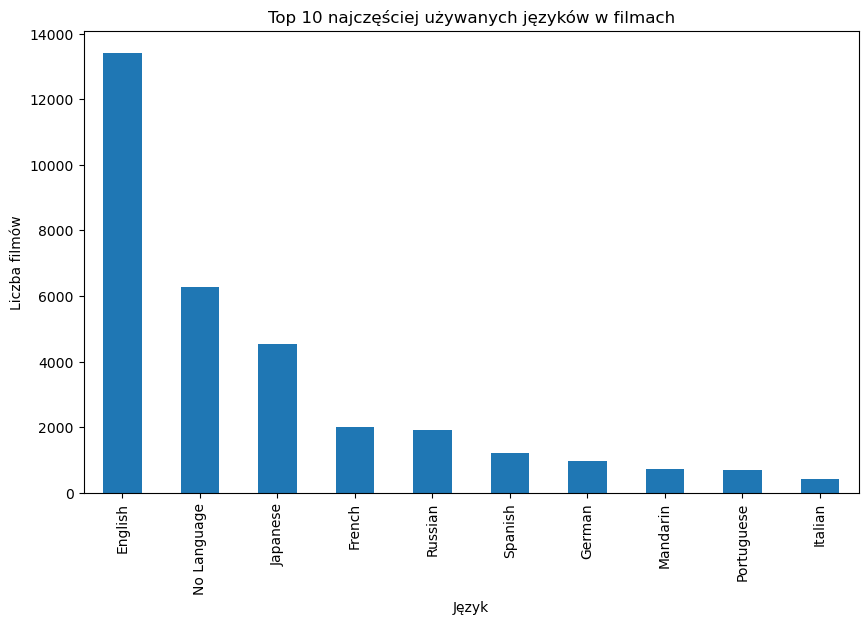

In [57]:
languages_series = df['spoken_languages'].dropna().str.split(',').explode().str.strip()
languages_counts = languages_series.value_counts().head(10)

languages_counts.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 najczęściej używanych języków w filmach')
plt.xlabel('Język')
plt.ylabel('Liczba filmów')
plt.show()

### Wnioski
Angielski jest najczęściej używanym językiem w filmach. „No language” prawdopodobnie oznacza filmy bez dialogów. Japoński, francuski i rosyjski również występują często. Hiszpański, niemiecki, mandaryński, portugalski i włoski pojawiają się rzadziej, co wskazuje na różnorodność językową w zbiorze danych.

## (5) Analiza zależności pomiedzy wybranymi zmiennymi

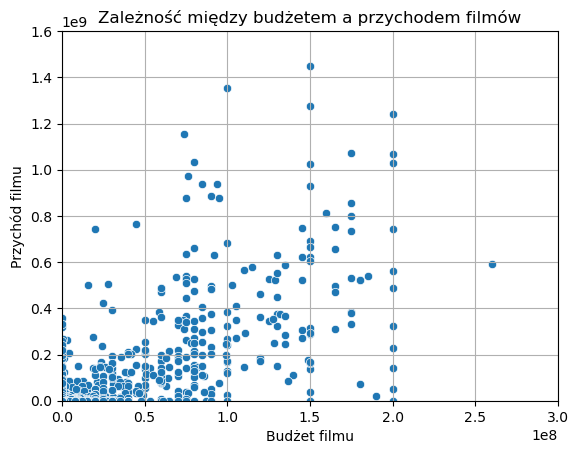

In [58]:
sns.scatterplot(data=df, x='budget', y='revenue')

plt.title('Zależność między budżetem a przychodem filmów')
plt.xlabel('Budżet filmu')
plt.ylabel('Przychód filmu')
plt.xlim(0, 3e8)
plt.ylim(0, 1.6e9)
plt.grid(True)
plt.show()

### Wnioski
Większość filmów dysponuje stosunkowo niskim budżetem, zazwyczaj do 100 milionów dolarów, jednak ich przychody są zróżnicowane. Warto zauważyć, że wysoki budżet nie zawsze przekłada się na finansowy sukces — zdarza się, że nawet drogie produkcje generują niewielkie zyski. Tylko nieliczne filmy osiągają przychody sięgające miliarda dolarów.

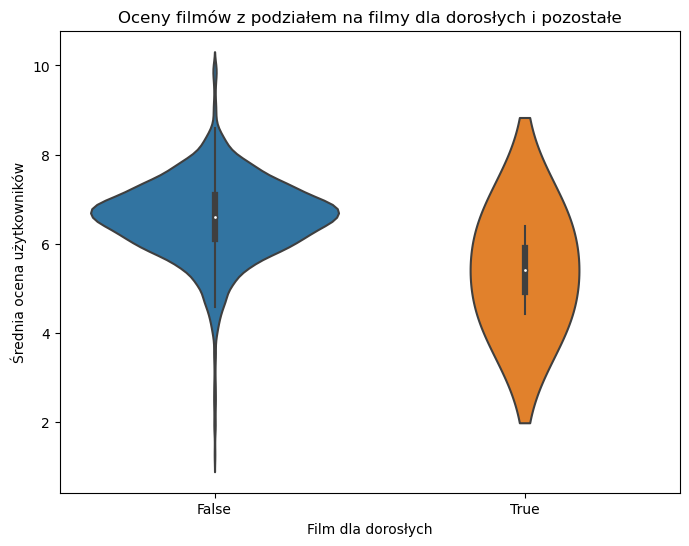

In [59]:
df_filtered = df[(df['vote_average'] > 0) & (df['vote_count'] >= 10)]
plt.figure(figsize=(8,6))
sns.violinplot(data=df_filtered, x='adult', y='vote_average')
plt.title('Oceny filmów z podziałem na filmy dla dorosłych i pozostałe')
plt.xlabel('Film dla dorosłych')
plt.ylabel('Średnia ocena użytkowników')
plt.show()

### Wnioski
Filmy dla dorosłych mają oceny skupione głównie w średnim zakresie, bez wielu bardzo niskich wyników. Natomiast filmy nie dla dorosłych mają więcej ocen zarówno na niskim, jak i na wysokim końcu skali, w porównaniu do filmów dla dorosłych, przy czym najwięcej ocen również znajduje się w średnim przedziale. Średnia ocena filmów nie dla dorosłych jest nieco wyższa niż filmów dla dorosłych.